In [1]:
from google.colab import files
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import copy
from matplotlib.colors import ListedColormap
uploaded = files.upload()






Saving breast-cancer.csv to breast-cancer.csv


In [2]:


file_name = 'breast-cancer.csv'


df = pd.read_csv(io.BytesIO(uploaded[file_name]))
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [33]:
x_train = df[['radius_mean', 'texture_mean','perimeter_mean','smoothness_mean','compactness_mean']].head(500).values
# Convert 'M' to 1 and 'B' to 0
y_train = df["diagnosis"].apply(lambda x: 1 if x == 'M' else 0).head(500).values

print("The type of x_train is:", type(x_train))

The type of x_train is: <class 'numpy.ndarray'>


In [36]:
def normalise_features(X):
    X_norm = np.zeros_like(X, dtype=float)
    # Store means and stds for later (for plotting the boundary)
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)

    for i in range(X.shape[1]):
        X_norm[:, i] = (X[:, i] - means[i]) / stds[i]

    return X_norm, means, stds

x_train_normal, means, stds = normalise_features(x_train)


print(x_train_normal.shape)

# X_final = np.c_[np.ones(x_train_normal.shape[0]), x_train_normal]
# print(X_final)

(500, 5)


Sigmoid of 10: 1.0000
Sigmoid of 0:  0.5000
Sigmoid of -10: 0.0000


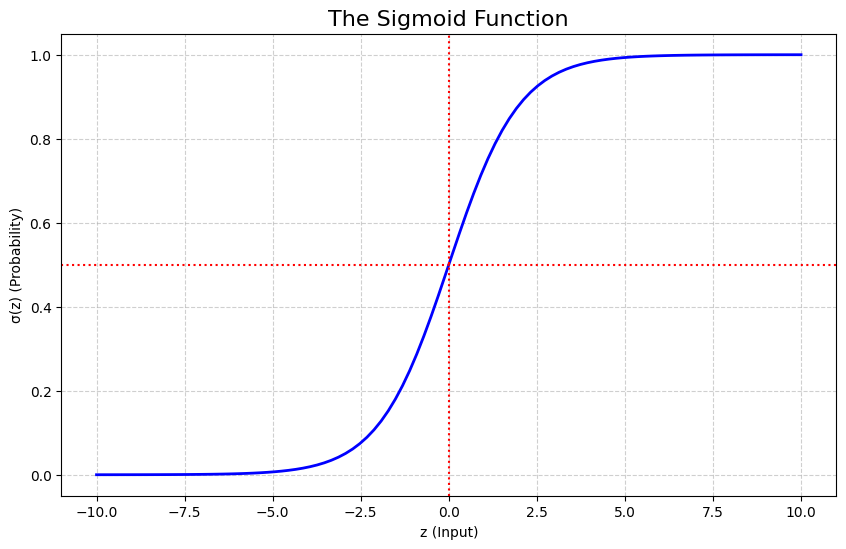

In [37]:


def sigmoid(z):
  """
  Computes the sigmoid function.

  Args:
    z: A scalar or NumPy array of any size.

  Returns:
    The sigmoid of z, with the same shape as z.
  """
  return 1 / (1 + np.exp(-z))
  z = np.dot(w[i],x[i]) + b

z_values = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(z_values)

# Print some example outputs to check the vlaues
print(f"Sigmoid of 10: {sigmoid(10):.4f}")
print(f"Sigmoid of 0:  {sigmoid(0):.4f}")
print(f"Sigmoid of -10: {sigmoid(-10):.4f}")


# Plot the sigmoid curve
plt.figure(figsize=(10, 6))
plt.plot(z_values, sigmoid_values, color='blue', lw=2)
plt.title('The Sigmoid Function', fontsize=16)
plt.xlabel('z (Input)')
plt.ylabel('σ(z) (Probability)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(y=0.5, color='red', linestyle=':') # Add a line at y=0.5
plt.axvline(x=0, color='red', linestyle=':') # Add a line at x=0
plt.show()

In [38]:
def compute_cost_logistic(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        cost += -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)
    return cost / m

In [39]:
def compute_gradient_logistic(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i], w) + b)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i, j]
        dj_db = dj_db + err_i
    return dj_db / m, dj_dw / m

In [40]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)
        if i < 100000:
            J_history.append(compute_cost_logistic(X, y, w, b))
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:.4f}")
    return w, b, J_history

In [41]:
w_in = np.zeros(x_train_normal.shape[1])
b_in = 0
alpha = 0.1
iterations = 4000

w_final, b_final, J_hist = gradient_descent(x_train_normal, y_train, w_in, b_in, alpha, iterations)
print(f"\nFinal parameters: w: {w_final}, b: {b_final}")

Iteration    0: Cost 0.6931
Iteration  400: Cost 0.1600
Iteration  800: Cost 0.1516
Iteration 1200: Cost 0.1489
Iteration 1600: Cost 0.1477
Iteration 2000: Cost 0.1471
Iteration 2400: Cost 0.1468
Iteration 2800: Cost 0.1467
Iteration 3200: Cost 0.1466
Iteration 3600: Cost 0.1465

Final parameters: w: [2.33938906 1.79516202 2.33089227 1.80421319 0.70106241], b: -0.7225263958346443


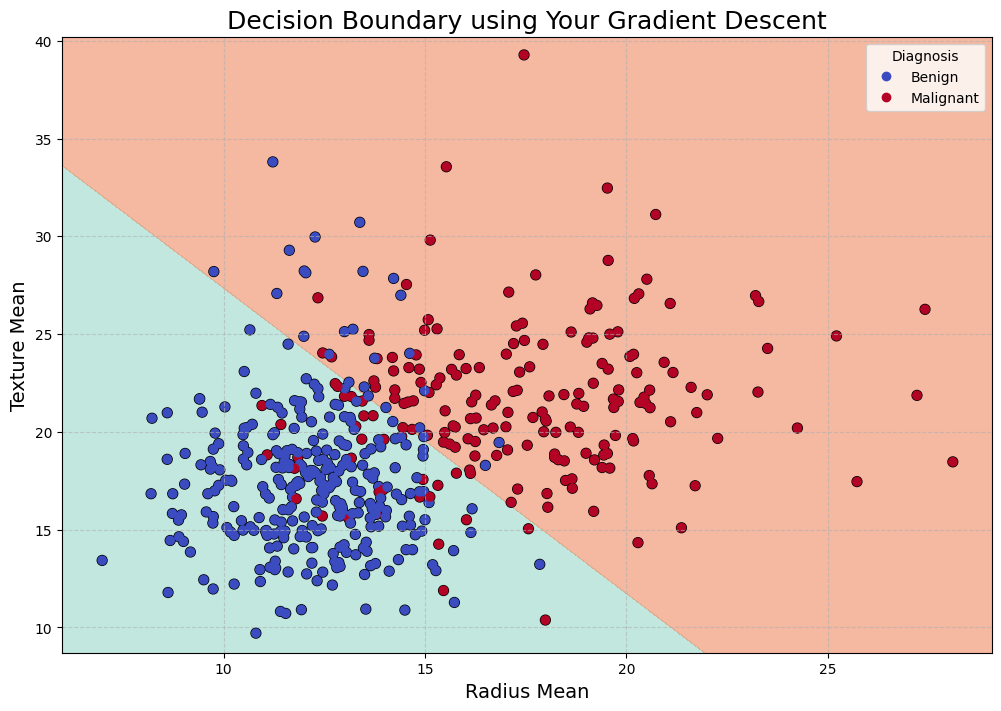

In [42]:
x_plot = x_train[:, :2]
x0_min, x0_max = x_plot[:, 0].min() - 1, x_plot[:, 0].max() + 1
x1_min, x1_max = x_plot[:, 1].min() - 1, x_plot[:, 1].max() + 1
xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, 0.1),
                       np.arange(x1_min, x1_max, 0.1))

# Create 5D grid points for prediction
grid_points_2d = np.c_[xx0.ravel(), xx1.ravel()]
num_grid_points = len(grid_points_2d)
grid_points_5d = np.full((num_grid_points, 5), means)
grid_points_5d[:, :2] = grid_points_2d

# Normalize grid points and predict
grid_points_norm_5d = (grid_points_5d - means) / stds
Z = sigmoid(np.dot(grid_points_norm_5d, w_final) + b_final)
Z = Z.reshape(xx0.shape)

# Create the plot
plt.figure(figsize=(12, 8))
custom_cmap = ListedColormap(['#99d8c9', '#ef8a62'])
plt.contourf(xx0, xx1, Z, cmap=custom_cmap, alpha=0.6, levels=[0, 0.5, 1])
plt.scatter(x_plot[:, 0], x_plot[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', s=50)

# Add titles and labels
plt.title('Decision Boundary using Your Gradient Descent', fontsize=18)
plt.xlabel('Radius Mean', fontsize=14)
plt.ylabel('Texture Mean', fontsize=14)
plt.legend(handles=plt.scatter(x_plot[:, 0], x_plot[:, 1], c=y_train, cmap='coolwarm').legend_elements()[0],
           labels=['Benign', 'Malignant'], title="Diagnosis")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

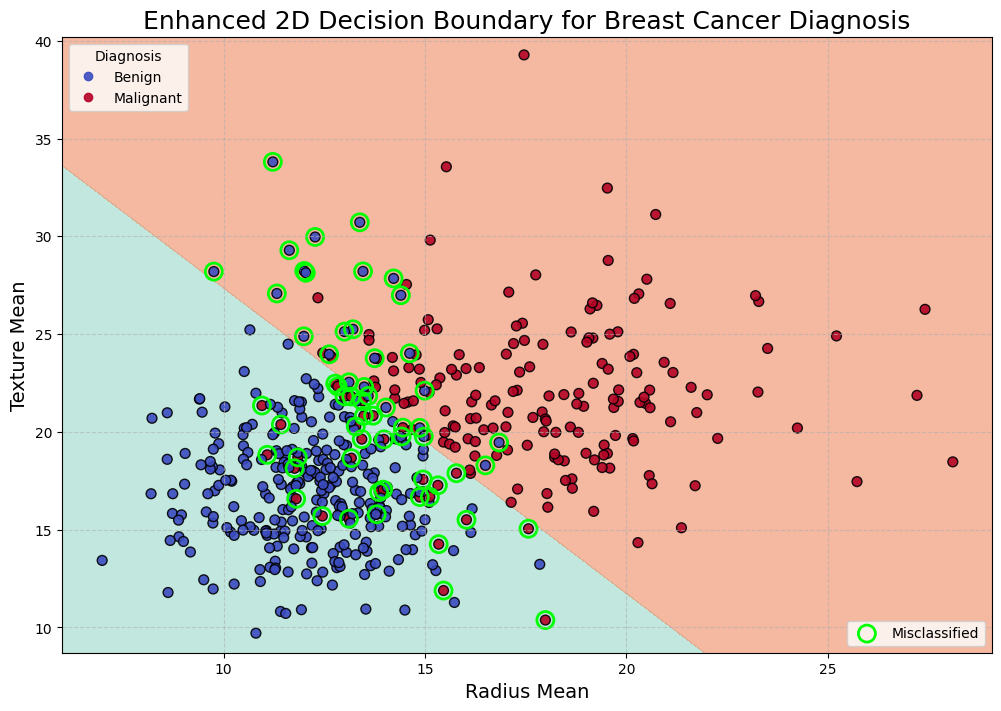

In [43]:
x0_min, x0_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
x1_min, x1_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, 0.1),
                       np.arange(x1_min, x1_max, 0.1))

# Normalize the grid points and make predictions
grid_points = np.c_[xx0.ravel(), xx1.ravel()]
grid_points_norm = (grid_points - means[:2]) / stds[:2] # Use only the first two means and stds
Z = sigmoid(np.dot(grid_points_norm, w_final[:2]) + b_final) # Use only the first two weights
Z = Z.reshape(xx0.shape)

# Create the plot
plt.figure(figsize=(12, 8))
custom_cmap = ListedColormap(['#99d8c9', '#ef8a62']) # Custom colors for the regions

# Plot the decision boundary and regions
plt.contourf(xx0, xx1, Z, cmap=custom_cmap, alpha=0.6, levels=[0, 0.5, 1])

# Plot the original data points
scatter = plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', s=50, alpha=0.9)

# Identify and highlight misclassified points
# Need to use the first two features for prediction here as well to match the plot
predictions = (sigmoid(np.dot(x_train_normal[:, :2], w_final[:2]) + b_final) > 0.5).astype(int)
misclassified = np.where(predictions != y_train)[0]
plt.scatter(x_train[misclassified, 0], x_train[misclassified, 1],
            facecolors='none', edgecolors='lime', s=150, lw=2, label='Misclassified')

# Add titles and labels
plt.title('Enhanced 2D Decision Boundary for Breast Cancer Diagnosis', fontsize=18)
plt.xlabel('Radius Mean', fontsize=14)
plt.ylabel('Texture Mean', fontsize=14)

# Create a more descriptive legend
handles, labels = scatter.legend_elements()
legend1 = plt.legend(handles, ['Benign', 'Malignant'], title="Diagnosis", loc="upper left")
plt.gca().add_artist(legend1) # Add the first legend
plt.legend(loc="lower right") # This will now show the 'Misclassified' label

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [44]:
def predict(X_new, w, b, means, stds):
    """
    Predicts the label for new data points.

    Args:
      X_new (ndarray): New data points, shape (m, n)
      w (ndarray): Trained weights, shape (n,)
      b (scalar): Trained bias
      means (ndarray): Means of the original training features
      stds (ndarray): Standard deviations of the original training features

    Returns:
      p (ndarray): Predictions (0 or 1), shape (m,)
    """
    # Normalize the new data using the training set's mean and std
    X_new_norm = (X_new - means) / stds

    # Calculate probability
    y_hat = sigmoid(np.dot(X_new_norm, w) + b)

    # Convert probability to a 0 or 1 prediction
    p = (y_hat >= 0.5).astype(int)


In [51]:
def predict(X_new, w, b, means, stds):
    """
    Predicts the label for new data points.

    Args:
      X_new (ndarray): New data points, shape (m, n)
      w (ndarray): Trained weights, shape (n,)
      b (scalar): Trained bias
      means (ndarray): Means of the original training features
      stds (ndarray): Standard deviations of the original training features

    Returns:
      p (ndarray): Predictions (0 or 1), shape (m,)
    """
    # Normalize the new data using the training set's mean and std
    X_new_norm = (X_new - means) / stds

    # Calculate probability
    y_hat = sigmoid(np.dot(X_new_norm, w) + b)

    # Convert probability to a 0 or 1 prediction
    p = (y_hat >= 0.5).astype(int)
    return p

# First, ask the user how many predictions they want to make
try:
    num_predictions = int(input("How many patients would you like to predict for? "))
except ValueError:
    print("Invalid input. Please enter a whole number. Exiting.")
    num_predictions = 0

# Loop 'n' times for 'n' inputs
for i in range(num_predictions):
    print(f"\n--- Patient {i + 1} of {num_predictions} ---")
    try:
        # Prompt the user for input
        user_input = input("Enter the 5 feature values (separated by commas): ")

        # Split the input string and convert to numbers
        feature_values = list(map(float, user_input.split(',')))

        # Check if the correct number of features was entered
        if len(feature_values) != 5:
            print("Invalid input. Please enter exactly five numbers.")
            continue # Skip to the next iteration

        # Format the input for the predict function
        patient_data = np.array([feature_values])

        # Make a prediction
        prediction_val = predict(patient_data, w_final, b_final, means, stds)

        # Display the result
        result = 'Malignant' if prediction_val[0] else 'Benign'
        print(f"Prediction: The diagnosis is {result}")

    except (ValueError, IndexError):
        # Handle incorrect input format
        print("Invalid input. Please enter five numbers separated by commas (e.g., 15.5, 20.1, 100.0, 0.1, 0.2)")


How many patients would you like to predict for? 2

--- Patient 1 of 2 ---
Enter the 5 feature values (separated by commas): 11.2 , 29.37 , 70.67 , 0.07449 , 0.03558
➡️ Prediction: The diagnosis is Benign

--- Patient 2 of 2 ---
Enter the 5 feature values (separated by commas): 20.6 , 29.33 , 140.1 , 0.1178 , 0.277 
➡️ Prediction: The diagnosis is Malignant


In [52]:
# Make predictions on the entire training set
all_predictions = predict(x_train, w_final, b_final, means, stds)

# Calculate accuracy
accuracy = np.mean(all_predictions == y_train) * 100

print(f"\nModel Accuracy on the training set: {accuracy:.2f}%")


Model Accuracy on the training set: 95.00%
